In [69]:
from importlib import reload
import pandas as pd
from scipy.io import arff
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from knn import CustomKNeighborsRegressor
from sklearn import tree, neighbors

from evaluation import evaluator

reload(evaluator)

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from gradient import MyGDRegressor

from evaluation import evaluator

from importlib import reload

# Infrared Thermography Temperature

In [ ]:
infrared_df = pd.read_csv("./infrared/FLIR_groups1and2.csv", header=None)
# Get actual header
infrared_headers = infrared_df.iloc[2]
# Remove Round header and measurements generic term
infrared_df = infrared_df[3:]
infrared_df.columns = infrared_headers

# Drop NaN columns and NaN rows
infrared_df = infrared_df.dropna(axis=1, how='all')
infrared_df = infrared_df.dropna()
# Remove all but one Round and insignificant columns
filtered_columns = [col for col in infrared_df.columns if
                    not col.endswith(('2', '3', '4')) and col not in ["Cosmetics", "Time", "Date", "SubjectID"]]
infrared_df = infrared_df[filtered_columns]

infrared_df = infrared_df.reset_index(drop=True)

for col in infrared_df.columns:
    try:
        infrared_df[col] = pd.to_numeric(infrared_df[col])
    except ValueError:
        print(col)

In [ ]:
print(infrared_df['Age'].unique())
print(infrared_df['Ethnicity'].unique())
print(infrared_df['Gender'].unique())

In [ ]:
infrared_df['Age'] = infrared_df['Age'].replace(['21-25', '26-30'], '21-30')
print(infrared_df['Age'].unique())

In [ ]:
feature_mappings = {
    'Age': ['18-20', '21-30', '31-40', '41-50', '51-60', '>60']
}
ordinal_cols = ['Age']
one_hot_cols = ['Ethnicity', 'Gender']
ordinal_categories = [feature_mappings[col] for col in ordinal_cols]

numerical_cols = infrared_df.select_dtypes(include="number").columns
# convert numerical columns to list
numerical_cols = numerical_cols.tolist()

preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('categorical', OneHotEncoder(handle_unknown="ignore"), one_hot_cols)
],
    remainder='passthrough'  # passthrough columns not listed in any pipeline
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])

ordinal_categories

In [ ]:
infrared_df = infrared_df.drop('aveOralF', axis=1)  # Set has two targets so drop one and chose the other
X = infrared_df.drop('aveOralM', axis=1)
y = infrared_df[('aveOralM')]

ir_X_train, ir_X_test, ir_y_train, ir_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ir_X_train = pipeline.fit_transform(ir_X_train)
ir_X_test = pipeline.transform(ir_X_test)
ir_X_train

# Black Friday

In [ ]:
data, meta = arff.loadarff("./black_friday.arff")
black_df = pd.DataFrame(data)

for column in black_df.columns:
    # replace missing values with pd.NA
    black_df[column] = black_df[column].replace(b'?', pd.NA)
    black_df[column] = black_df[column].replace(b'', pd.NA)
    black_df[column] = black_df[column].replace(b'NONE', pd.NA)
    # decode bytes to string for each column
    black_df[column] = black_df[column].apply(lambda x: x.decode() if isinstance(x, bytes) else x)
black_df

In [ ]:
y = black_df[('Purchase')]
X = black_df.drop('Purchase', axis=1)  # Features

bf_X_train, bf_X_test, bf_y_train, bf_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(black_df['Age'].unique())

In [ ]:
feature_mappings = {
    'Age': ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
}
ordinal_cols = ['Age']
one_hot_cols = ['City_Category', 'Gender', 'Stay_In_Current_City_Years']
ordinal_categories = [feature_mappings[col] for col in ordinal_cols]

numerical_cols = [col for col in infrared_df.select_dtypes(include="number").columns if col != 'Purchase']

preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('categorical', OneHotEncoder(handle_unknown="ignore"), one_hot_cols),
],
    remainder='passthrough'  # passthrough columns not listed in any pipeline
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])



In [ ]:

bf_X_train = pipeline.fit_transform(bf_X_train)
bf_X_test = pipeline.transform(bf_X_test)
bf_X_train

# Power plant

In [ ]:
ccpp_df = pd.read_excel("./CCPP/Folds5x2_pp.xlsx")
ccpp_df

In [ ]:
X = ccpp_df.drop('PE', axis=1)
y = ccpp_df.PE
# Split for training
ccpp_X_train, ccpp_X_test, ccpp_y_train, ccpp_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cols_to_scale = remaining_columns = [col for col in ccpp_df.columns if col != "PE"]
preprocessor = ColumnTransformer(
    transformers=[('scaler', MinMaxScaler(), cols_to_scale)],
    remainder='passthrough')

ccpp_X_train = preprocessor.fit_transform(ccpp_X_train)
ccpp_X_test = preprocessor.transform(ccpp_X_test)
ccpp_X_train

## knn evaluation

### neighbors

### metric

### leaf size

## gradient

# datasets

In [ ]:
## Decision Tree Regressor
## Gradient Descent
## KNN

## Infrared Thermo Temperature

In [ ]:
tree_reg = tree.DecisionTreeRegressor()
knn_reg = neighbors.KNeighborsRegressor(20)

## Black Friday

In [ ]:
tree_reg = tree.DecisionTreeRegressor()
knn_reg = neighbors.KNeighborsRegressor(20)

## Power Plant

In [ ]:
tree_reg = tree.DecisionTreeRegressor()
knn_reg = neighbors.KNeighborsRegressor(20)

## Gradient Descent Evaluation

### Learning rate

Evaluating Model:  MyGDRegressor
Hyperparameters:  {'alpha': 0.001}
Hyperparameter  max_iter  value:  100
R2:  -309.7947884679558
MSE:  64.38848746742305
Hyperparameter  max_iter  value:  200
R2:  -124.96654295362427
MSE:  26.096947160104325
Hyperparameter  max_iter  value:  500
R2:  -106.65905894218082
MSE:  22.304119067195643
Evaluating Model:  SGDRegressor
Hyperparameters:  {'alpha': 0.001, 'eta0': 0.001, 'loss': 'squared_error', 'learning_rate': 'constant', 'tol': None, 'shuffle': False, 'penalty': None}
Hyperparameter  max_iter  value:  100
R2:  -1.2664117340085461
MSE:  0.46954076756108754
Hyperparameter  max_iter  value:  200
R2:  0.1974607647165052
MSE:  0.16626497422267558
Hyperparameter  max_iter  value:  500
R2:  0.5703394315133632
MSE:  0.0890143437270026


KeyboardInterrupt: 

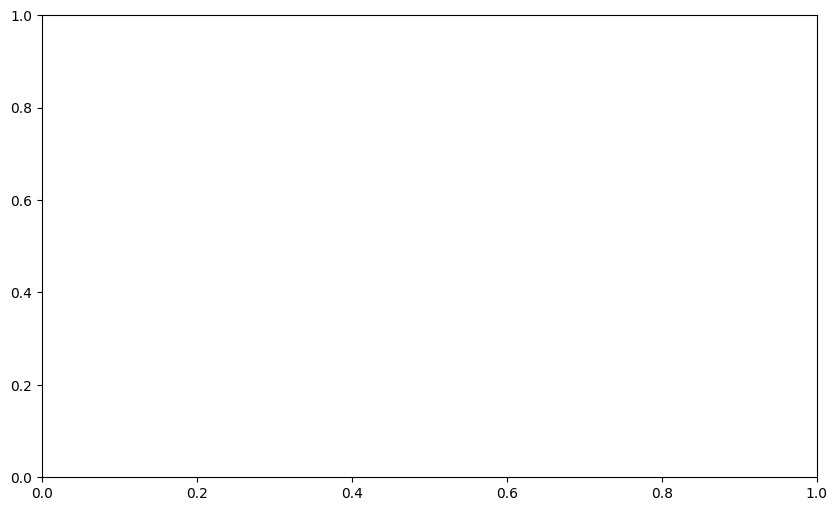

In [82]:
import numpy as np

reload(evaluator)

ir_y_train = ir_y_train.astype(float)
ir_y_test = ir_y_test.astype(float)

alpha = 0.001

hyperparameters_my_gd = {
    #'max_iter': 1000,
    'alpha': alpha,
}

hyperparameters_sgd = {
    #'max_iter':1000, 
    'alpha': alpha,
    'eta0': alpha,
    'loss': 'squared_error',
    'learning_rate': 'constant',
    'tol': None,
    'shuffle':False,
    'penalty': None,
}


base_values = [100, 200, 500]
scaled_values = base_values.copy()
# for i in range(1, 3):
#     for value in base_values:
#         scaled_values.append(value * (10 ** i))
# scaled_values.append(100000)
# scaled_values.pop(0)  # Remove 100 as its not a useful max_iter value

hyperparameters_iterator = {'max_iter': scaled_values}

ir_max_iter_my_sg_regressor = evaluator.evaluate2(MyGDRegressor,
                                                  ir_X_train, ir_y_train, ir_X_test, ir_y_test,
                                                  hyperparameters=hyperparameters_my_gd,
                                                  hyperparameters_iterate=hyperparameters_iterator)

ir_max_iter_sgd_regressor = evaluator.evaluate2(SGDRegressor,
                                                ir_X_train, ir_y_train, ir_X_test, ir_y_test,
                                                hyperparameters=hyperparameters_sgd,
                                                hyperparameters_iterate=hyperparameters_iterator)

# evaluator.draw_diagram2_list({"gradient": ir_max_iter_my_sg_regressor}, x_axis='max_iter', y_axis=['R2', 'MSE', 'time'], logaritmic=True)

evaluator.draw_diagram2_with_multiple_lines([ir_max_iter_my_sg_regressor, ir_max_iter_sgd_regressor], x_axis='max_iter', y_axis=['R2', 'MSE', 'time'],logaritmic=True)


### Max Iterations

### Runtime comparison

### Best run comparison

In [ ]:
# ir_X_train, ir_X_test, ir_y_train, ir_y_test

ir_y_train = ir_y_train.astype(float)
ir_y_test = ir_y_test.astype(float)

max_iter = 1000
alpha = 0.0001

sgd_regressor = SGDRegressor(max_iter=max_iter, alpha=alpha, eta0=alpha,
                             loss='squared_error',
                             learning_rate='constant', tol=None,
                             shuffle=False,
                             penalty=None
                             )
sgd_regressor.fit(ir_X_train, ir_y_train)
sgd_y_pred = sgd_regressor.predict(ir_X_test)

my_gd_regressor = MyGDRegressor(max_iter=max_iter, alpha=alpha)
my_gd_regressor.fit(ir_X_train, ir_y_train)
my_y_pred = my_gd_regressor.predict(ir_X_test)

# Calc mean squared error for evaluation
sgd_mse = mean_squared_error(ir_y_test, sgd_y_pred)
my_mse = mean_squared_error(ir_y_test, my_y_pred)
print("sklearn sgd regressor: ", sgd_mse)
print("my regressor: ", my_mse)